# IST 718: Big Data Analytics

- Professor: Daniel Acuna <deacuna@syr.edu>

## General instructions:

- You are welcome to discuss the problems with your classmates but __you are not allowed to copy any part of your answers either from your classmates or from the internet__
- You can put the homework files anywhere you want in your https://jupyterhub.ischool.syr.edu/ workspace but _do not change_ the file names. The TAs and the professor use these names to grade your homework.
- Remove or comment out code that contains `raise NotImplementedError`. This is mainly to make the `assert` statement fail if nothing is submitted.
- The tests shown in some cells (i.e., `assert` and `np.testing.` statements) are used to grade your answers. **However, the professor and TAs will use __additional__ test for your answer. Think about cases where your code should run even if it passess all the tests you see.**
- Before downloading and submitting your work through Blackboard, remember to save and press `Validate` (or go to 
`Kernel`$\rightarrow$`Restart and Run All`). 
- Good luck!

In [7]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import TensorDataset, DataLoader
import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

## Question 1 (30 pts)

Consider the following periodic dataset:

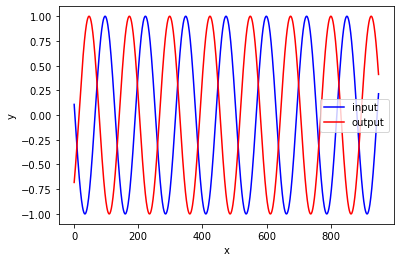

In [8]:
# READ ONLY CELL
import numpy as np
import torch

np.random.seed(2)

T = 20
L = 1000
N = 100

x = np.empty((N, L), 'int64')
x[:] = np.array(range(L)) + np.random.randint(-4 * T, 4 * T, N).reshape(N, 1)
data = np.sin(x / 1.0 / T).astype('float32')

X0 = data[:, :-50]
Y0 = data[:, 50:]

# randomize the data
dataloader = DataLoader(TensorDataset(
    torch.from_numpy(X0).reshape(X0.shape[0], X0.shape[1], -1), 
    torch.from_numpy(Y0).reshape(Y0.shape[0], Y0.shape[1], -1)), batch_size=10, 
                        shuffle=True)

# Flattens the dimensions of a convolutional network
class CustomLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=1):
        super(CustomLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers)

    def forward(self, x):
        output, _ = self.lstm(x)
        return output

plt.plot(X0[0], 'b');
plt.plot(Y0[0], 'r');
plt.xlabel('x');
plt.ylabel('y');
plt.legend(['input', 'output']);

In this question, we will compare how well an MLP and LSTM can model such data. For this, we will use the following helper function that trains the model on this data and displays the results every 10 epochs for a total of 100 epochs.

In [9]:
# READ ONLY CELL
def train_and_display(model, dataloader):
    num_epochs = 100
    learning_rate = 0.01
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    # Train the model
    total_step = len(dataloader)
    loss_list = []
    acc_list = []
    for epoch in range(num_epochs):
        for i, (inputs, labels) in enumerate(dataloader):
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss_list.append(loss.item())

            # Backprop and perform Adam optimisation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        if (epoch+1) % 10 == 0:
            plt.figure(figsize=[2,2])
            plt.plot(labels[0, :, 0].detach().numpy(), 'b');
            plt.plot(model(inputs)[0, :, 0].detach().numpy(), 'r--');
            plt.xlabel('x');
            plt.ylabel('y');
            plt.title(f'Epoch #{epoch+1}');
            plt.legend(['data', 'prediction']);      

For example, the following code defines a simple linear regression and displays its performance:

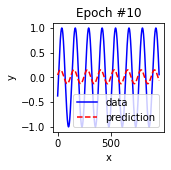

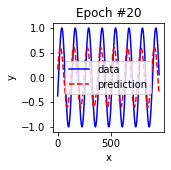

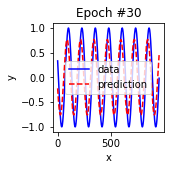

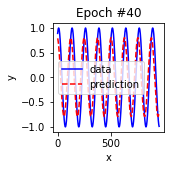

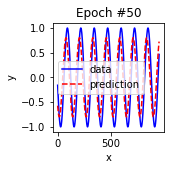

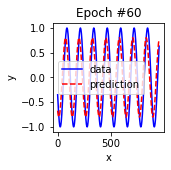

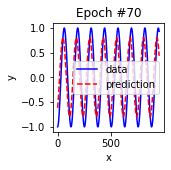

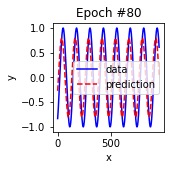

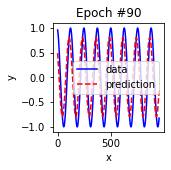

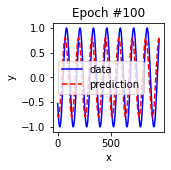

In [10]:
# Example
linear_regression = nn.Sequential(nn.Linear(1, 1))
train_and_display(linear_regression, dataloader)

Define a multilayer perceptron model with 3 hidden layers and the following number of units per hidden layer: 10, 15, and 5. Use the sigmoid activation function (`nn.Sigmoid`). Below is the neural network partially defined. Copy it into the answer cell and complete `____`:

```python
MLP = nn.Sequential(
    nn.Linear(1, ____),
    nn.Sigmoid(),
    nn.Linear(____, 15),
    ____,
    nn.Linear(____, ____),
    nn.Sigmoid(),
    nn.Linear(____, ____))
```

In [16]:
# Create the MLP variable below
# YOUR CODE HERE
MLP = nn.Sequential(
    nn.Linear(1, 10),
    nn.Sigmoid(),
    nn.Linear(10, 15),
    nn.Sigmoid(),
    nn.Linear(15, 5),
    nn.Sigmoid(),
    nn.Linear(5,1))

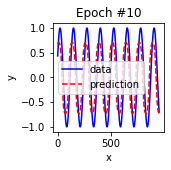

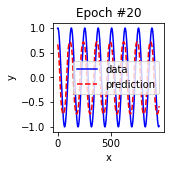

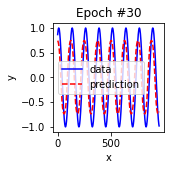

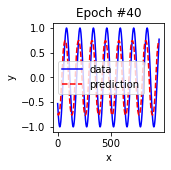

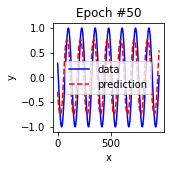

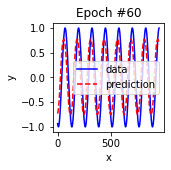

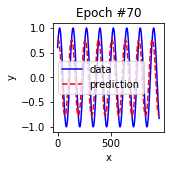

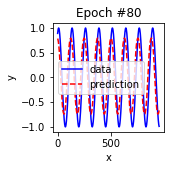

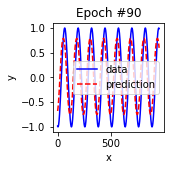

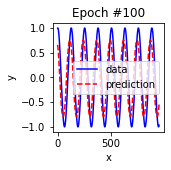

In [17]:
# plot the performance of the model
train_and_display(MLP, dataloader)

In [18]:
# 30 pts
assert type(MLP) == nn.Sequential
np.testing.assert_equal(
    set([type(L) for L in list(MLP.children())]),
    {nn.Sigmoid, nn.Linear}
)
assert len(list(MLP.children())) == 7

## Question 2 (35 pts)
Follow the code in the `pytorch_cnn_rnn.ipynb` notebook and use the `CustomLSTM` module defined above to create a neural network that stacks two LSTM, one with 10 hidden units and another with 5 hidden units. Assign the model to the variable `stacked_lstm`.

```python
stacked_lstm = nn.Sequential(
                      _____, 
                      _____,
                      nn.Linear(____, 1))
```

In [20]:
# create variable stacked_lstm below
class CustomLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=1):
        super(CustomLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers)

    def forward(self, x):
        output, _ = self.lstm(x)
        return output
    
stacked_lstm = nn.Sequential(CustomLSTM(1, 10), 
                             nn.Linear(10,5),
                      nn.Linear(5, 1))


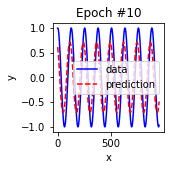

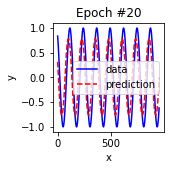

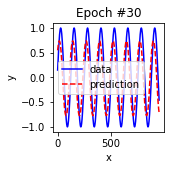

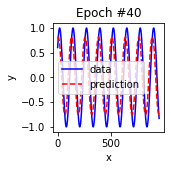

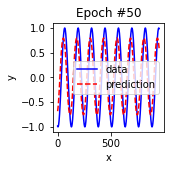

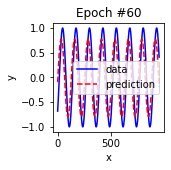

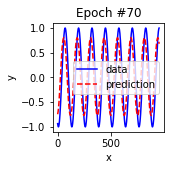

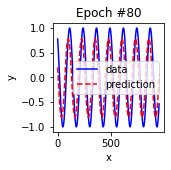

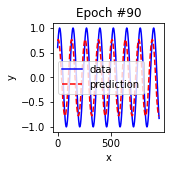

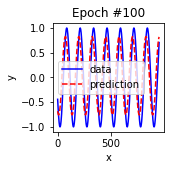

In [21]:
# plot the performance of the model - this should take significantly more time
train_and_display(stacked_lstm, dataloader)

In [ ]:
# 35 pts
assert type(stacked_lstm) == nn.Sequential
np.testing.assert_equal(
    set([type(L) for L in list(stacked_lstm.children())]),
    {CustomLSTM, nn.Linear}
)